In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

emotion_folders = ['angry', 'fear', 'happy', 'sad']
data = []
for emotion in emotion_folders:
    folder_path = os.path.join(emotion)
    files = os.listdir(folder_path)
    for file in files:
        data.append([file, emotion])

df = pd.DataFrame(data, columns=['file', 'emotion'])
train_ratio = 0.7
train_df, test_df = train_test_split(df, train_size=train_ratio, random_state=42)
train_test_folders = ['train', 'test']

for emotion in emotion_folders:
    for tt in train_test_folders:
        directory = os.path.join( f'{emotion}_{tt}')
        if not os.path.exists(directory):
            os.makedirs(directory)

for index, row in train_df.iterrows():
    os.rename(os.path.join( row['emotion'], row['file']), os.path.join( f'{row["emotion"]}_train', row['file']))

for index, row in test_df.iterrows():
    os.rename(os.path.join( row['emotion'], row['file']), os.path.join( f'{row["emotion"]}_test', row['file']))

ValueError: With n_samples=0, test_size=None and train_size=0.7, the resulting train set will be empty. Adjust any of the aforementioned parameters.

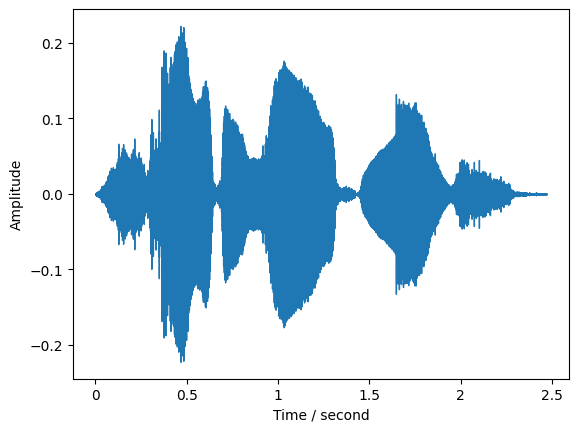

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

signal, sample_rate = librosa.load('./sad_test/YAF_mess_sad.wav')

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

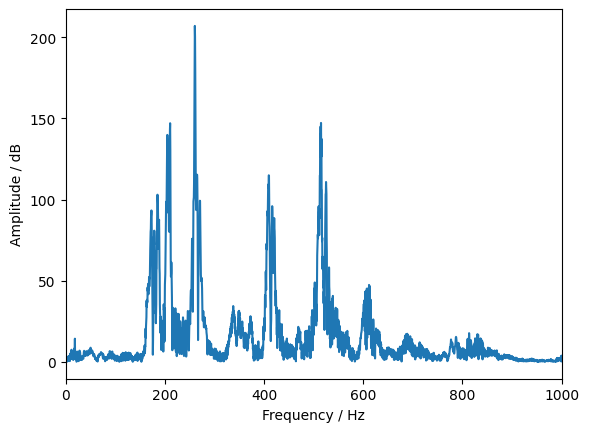

In [3]:
# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

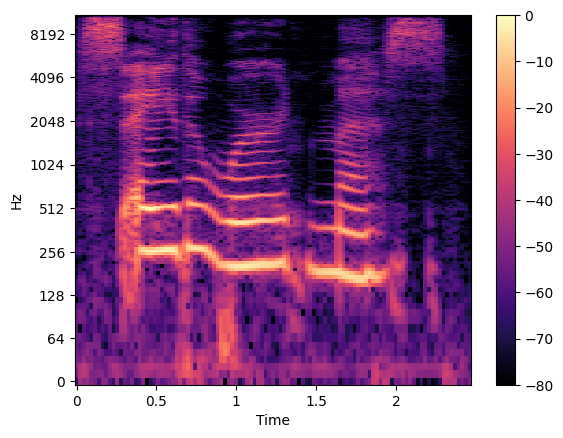

In [4]:
# plot the time-frequency variation of the audio
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

[0.00051907 0.0013982  0.00309855 0.00580774 0.00766115 0.01044403
 0.01302305 0.01300696 0.01143628 0.01267052 0.01185586 0.00936003
 0.00888116 0.01581705 0.01520923 0.01897443 0.03031154 0.03803654
 0.0465939  0.05488521 0.05893301 0.05551772 0.04699151 0.0415711
 0.04166083 0.04426632 0.04383051 0.03077082 0.01095534 0.00896903
 0.02464476 0.03172757 0.02946312 0.02736624 0.02524939 0.02142543
 0.01641872 0.01405355 0.0135943  0.01489649 0.01931558 0.02773433
 0.03656444 0.0412925  0.04231118 0.0419652  0.04107366 0.03946567
 0.03779144 0.03604737 0.03421294 0.03214349 0.02982323 0.02729686
 0.02534494 0.02427742 0.01892723 0.00807224 0.00283624 0.00266529
 0.00230175 0.00155623 0.003709   0.00889106 0.01285564 0.0158802
 0.01811552 0.01977718 0.02093547 0.0221409  0.02473288 0.02837964
 0.02835127 0.02795821 0.0274818  0.02718811 0.02632982 0.02488301
 0.0241301  0.02118011 0.01668111 0.01239663 0.00840274 0.00516271
 0.00359028 0.00599148 0.00816006 0.0087417  0.00783958 0.007122

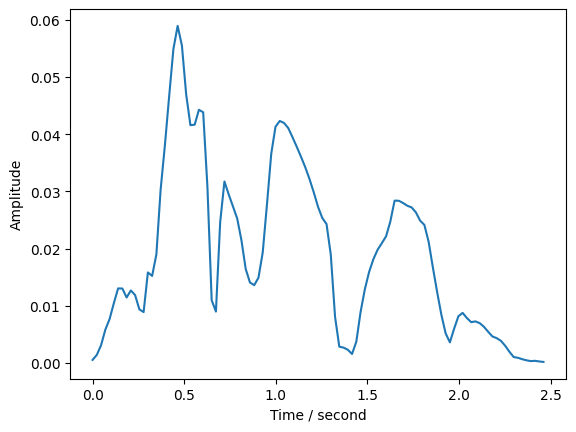

In [6]:
# audio feature extraction: loudness
import pandas as pd

df_loudness = pd.DataFrame()
S, phase = librosa.magphase(librosa.stft(signal))
rms = librosa.feature.rms(S=S)
print(rms[0])
df_loudness['Loudness'] = rms[0]
print(df_loudness.head(5))
plt.figure(4)
times = librosa.times_like(rms)
plt.plot(times, rms[0])
plt.xlabel("Time / second")
plt.ylabel("Amplitude")
plt.show()

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6   
0 -509.122955 -436.499420 -408.350189 -381.853241 -369.738281 -370.304962  \
1    1.248260  -25.940010  -52.621407  -58.427544  -59.024284  -67.647881   
2    4.052345   17.666454   41.046028   51.903145   56.148838   76.300659   
3   22.935347   21.514126    8.747133  -10.116774  -14.136258   -1.894618   
4   15.451279    7.667169    6.927149   14.724166   18.961765   18.776369   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -364.805634 -366.943542 -367.941681 -376.188568 -389.691101 -365.033112  
1  -76.971848  -89.896271  -88.672348  -89.381989  -88.721550  -50.400116  
2   74.998352   62.826370   57.414017   70.384010   76.029541   92.787231  
3   -4.576370   -4.996169   -8.581299   -9.772617  -15.458080    1.936125  
4   22.064316   22.720345   19.552425   16.678581   12.729145   22.169357  


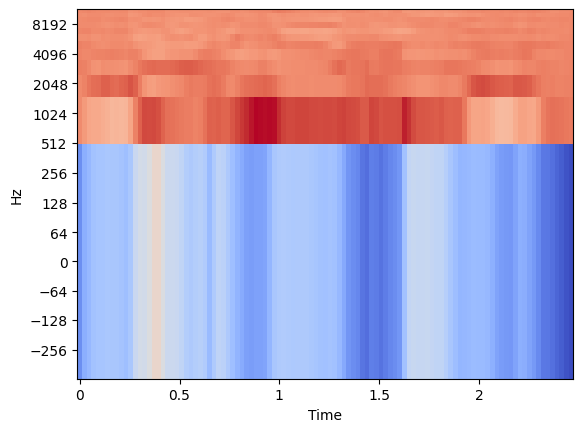

In [7]:
# audio feature extraction: mel-frequency cepstral coefficients
df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
plt.figure(5)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

        ZCR
0  0.212402
1  0.375977
2  0.560547
3  0.664062
4  0.730957


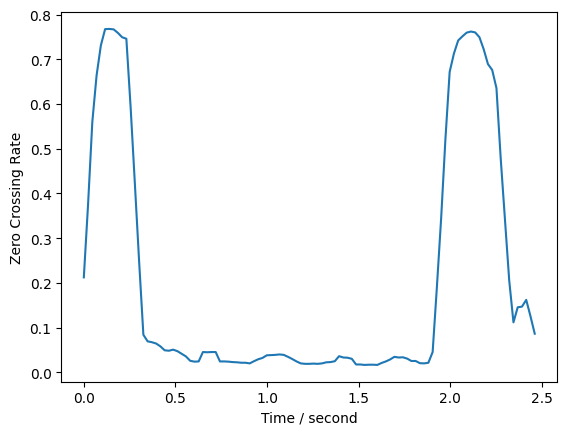

In [8]:
# audio feature extraction: zero crossing rate
df_zero_crossing_rate = pd.DataFrame()
zcr = librosa.feature.zero_crossing_rate(y=signal)
df_zero_crossing_rate['ZCR'] = zcr[0]
print(df_zero_crossing_rate.head(5))
plt.figure(6)
times = librosa.times_like(zcr)
plt.plot(times, zcr[0])
plt.xlabel("Time / second")
plt.ylabel("Zero Crossing Rate")
plt.show()

In [10]:
from IPython.lib.display import Audio
Audio(data=signal, rate=sample_rate)

   Mel_Spectrogram_1  Mel_Spectrogram_2  Mel_Spectrogram_3  Mel_Spectrogram_4   
0           0.000128           0.000310           0.000437           0.000352  \
1           0.000042           0.000111           0.000137           0.000277   
2           0.000010           0.000048           0.000067           0.000184   
3           0.000023           0.000056           0.000071           0.000089   
4           0.000028           0.000054           0.000069           0.000105   

   Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  Mel_Spectrogram_8   
0           0.000349           0.000730           0.000572           0.000329  \
1           0.000405           0.000506           0.000479           0.000203   
2           0.000249           0.000132           0.000098           0.000057   
3           0.000112           0.000107           0.000119           0.000069   
4           0.000117           0.000066           0.000090           0.000090   

   Mel_Spectrogram_9  Mel_

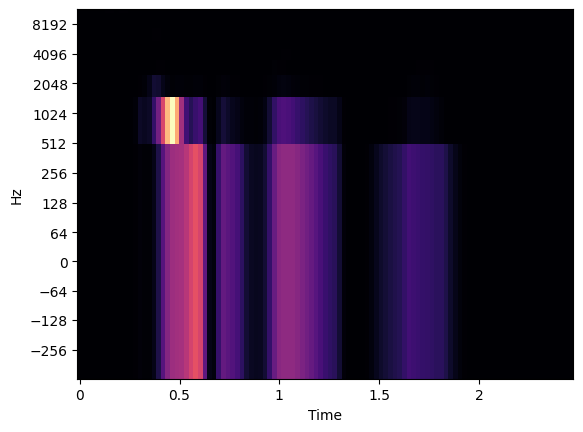

In [15]:
import librosa
import pandas as pd
import matplotlib.pyplot as plt

df_mel_spectrogram = pd.DataFrame()
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
for n_mel in range(len(mel_spectrogram)):
    df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
print(df_mel_spectrogram.head(5))
plt.figure(8)
librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7   
0  1.000000  0.803723  1.000000  1.000000  1.000000  1.000000  0.606863  \
1  0.738480  0.727807  0.813327  0.774498  0.665396  0.954717  0.778248   
2  0.732256  1.000000  0.780975  0.677606  0.739972  0.729275  1.000000   
3  0.504957  0.485602  0.404301  0.376898  0.404092  0.352123  0.586105   
4  0.492472  0.489249  0.375836  0.406072  0.453699  0.413104  0.244788   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.349071  0.444350   0.567556   0.538787   0.572045  
1  0.485026  0.512964   0.490917   0.507197   0.694715  
2  1.000000  1.000000   1.000000   1.000000   1.000000  
3  0.677462  0.553941   0.530649   0.570202   0.616923  
4  0.202491  0.239127   0.177382   0.238892   0.276116  


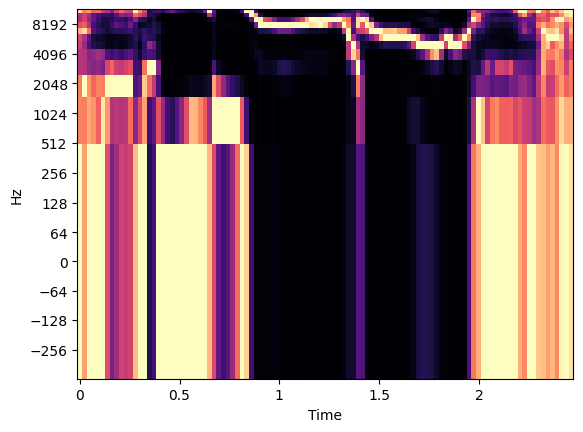

In [16]:
df_chroma = pd.DataFrame()
chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
for n_chroma in range(len(chromagram)):
    df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
print(df_chroma.head(5))
plt.figure(7)
librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6   
0 -509.122955 -436.499420 -408.350189 -381.853241 -369.738281 -370.304962  \
1    1.248260  -25.940010  -52.621407  -58.427544  -59.024284  -67.647881   
2    4.052345   17.666454   41.046028   51.903145   56.148838   76.300659   
3   22.935347   21.514126    8.747133  -10.116774  -14.136258   -1.894618   
4   15.451279    7.667169    6.927149   14.724166   18.961765   18.776369   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -364.805634 -366.943542 -367.941681 -376.188568 -389.691101 -365.033112  
1  -76.971848  -89.896271  -88.672348  -89.381989  -88.721550  -50.400116  
2   74.998352   62.826370   57.414017   70.384010   76.029541   92.787231  
3   -4.576370   -4.996169   -8.581299   -9.772617  -15.458080    1.936125  
4   22.064316   22.720345   19.552425   16.678581   12.729145   22.169357  


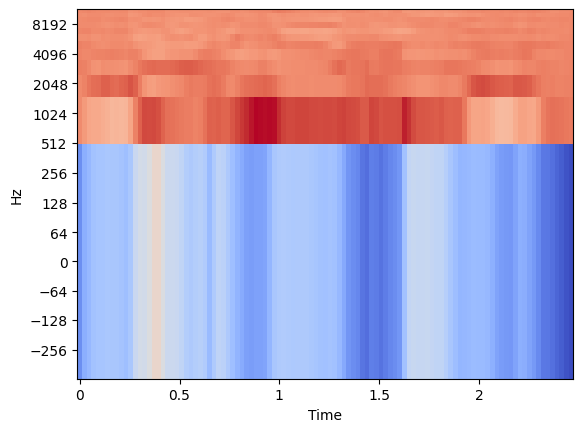

In [18]:
df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
plt.figure(5)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

   Spectral_Contrast_1  Spectral_Contrast_2  Spectral_Contrast_3   
0            11.540336            10.355511             8.090113  \
1            12.152709            12.048962            13.770641   
2            11.777604            18.105111            10.423075   
3            13.533093            18.700423            14.580366   
4            14.660899            12.825794            11.351243   

   Spectral_Contrast_4  Spectral_Contrast_5  Spectral_Contrast_6   
0            11.805263            11.971562            13.962407  \
1            15.499213            17.587072            18.940603   
2            13.243966            17.394046            20.073766   
3            13.372421            17.296846            18.419538   
4            12.143518            13.759597            17.070898   

   Spectral_Contrast_7  
0            27.004728  
1            39.283919  
2            46.704559  
3            45.546309  
4            44.882613  


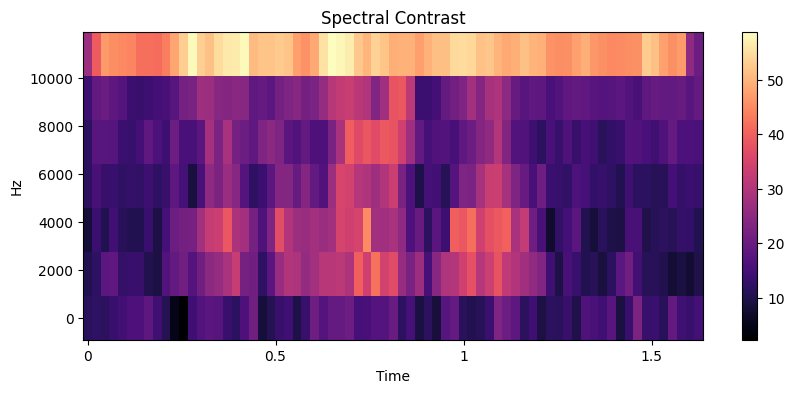

In [29]:
df_spectral_contrast = pd.DataFrame()
spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate)
spectral_contrast_transposed = spectral_contrast.T
for n_contrast in range(spectral_contrast_transposed.shape[1]):
    df_spectral_contrast[f'Spectral_Contrast_{n_contrast + 1}'] = spectral_contrast_transposed[:, n_contrast]
print(df_spectral_contrast.head(5))
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title('Spectral Contrast')
plt.show()

In [106]:
import os
import librosa
from sklearn.preprocessing import StandardScaler


emotion_folders = ['sad_train', 'happy_train', 'angry_train', 'fear_train']
base_path = './'  # Replace with the path to your train folders
emotions = []
features = []

for emotion in emotion_folders:
    folder_path = os.path.join(base_path, emotion)
    #print(folder_path)
    #print(f"Processing {emotion} folder...")

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        signal, sample_rate = librosa.load(file_path)

        scaler = StandardScaler()

        # Mel spectrogram scaling
        df_mel_spectrogram = pd.DataFrame()
        mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(mel_spectrogram)):
            df_mel_spectrogram['Mel_Spectrogram_%d' % (n_mel + 1)] = mel_spectrogram.T[n_mel]
        #df_mel_spectrogram = pd.DataFrame(scaler.fit_transform(df_mel_spectrogram), columns=df_mel_spectrogram.columns)

        # Chroma scaling
        df_chroma = pd.DataFrame()
        chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d' % (n_chroma + 1)] = chromagram.T[n_chroma]
        #df_chroma = pd.DataFrame(scaler.fit_transform(df_chroma), columns=df_chroma.columns)

        # MFCC scaling
        df_mfccs = pd.DataFrame()
        mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d' % (n_mfcc + 1)] = mfccs.T[n_mfcc]
        df_mfccs = pd.DataFrame(scaler.fit_transform(df_mfccs), columns=df_mfccs.columns)

        # Mel spectrogram averaging
        df_mel_spectrogram_avg = df_mel_spectrogram.mean(axis=0)

        # Chroma averaging
        df_chroma_avg = df_chroma.mean(axis=0)

        # MFCC averaging
        df_mfccs_avg = df_mfccs.mean(axis=0)

        # Feature concatenation
        feature_matrix_avg = pd.concat([df_mel_spectrogram_avg, df_chroma_avg, df_mfccs_avg])
        input_string = emotion
        substring_before_underscore = input_string.split("_")[0]
        emotions.append(substring_before_underscore)
        features.append(feature_matrix_avg.values)



train_feature = features
train_emotion = emotions

#Step 2: Feature Concatenation

In [107]:
import os
import librosa
from sklearn.preprocessing import StandardScaler


emotion_folders = ['sad_test', 'happy_test', 'angry_test', 'fear_test']
base_path = './'  # Replace with the path to your train folders
emotions = []
features = []

for emotion in emotion_folders:
    folder_path = os.path.join(base_path, emotion)
    #print(folder_path)

    for file in os.listdir(folder_path):
        #print(file)
        file_path = os.path.join(folder_path, file)
        signal, sample_rate = librosa.load(file_path)

        scaler = StandardScaler()

        # Mel spectrogram scaling
        df_mel_spectrogram = pd.DataFrame()
        mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(mel_spectrogram)):
            df_mel_spectrogram['Mel_Spectrogram_%d' % (n_mel + 1)] = mel_spectrogram.T[n_mel]
        #df_mel_spectrogram = pd.DataFrame(scaler.fit_transform(df_mel_spectrogram), columns=df_mel_spectrogram.columns)

        # Chroma scaling
        df_chroma = pd.DataFrame()
        chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d' % (n_chroma + 1)] = chromagram.T[n_chroma]
        #df_chroma = pd.DataFrame(scaler.fit_transform(df_chroma), columns=df_chroma.columns)

        # MFCC scaling
        df_mfccs = pd.DataFrame()
        mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d' % (n_mfcc + 1)] = mfccs.T[n_mfcc]
        df_mfccs = pd.DataFrame(scaler.fit_transform(df_mfccs), columns=df_mfccs.columns)

        # Mel spectrogram averaging
        df_mel_spectrogram_avg = df_mel_spectrogram.mean(axis=0)

        # Chroma averaging
        df_chroma_avg = df_chroma.mean(axis=0)

        # MFCC averaging
        df_mfccs_avg = df_mfccs.mean(axis=0)

        # Feature concatenation
        feature_matrix_avg = pd.concat([df_mel_spectrogram_avg, df_chroma_avg, df_mfccs_avg])
        input_string = emotion
        substring_before_underscore = input_string.split("_")[0]
        emotions.append(substring_before_underscore)
        features.append(feature_matrix_avg.values)

test_feature = features
test_emotion = emotions

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

X_train = train_feature
Y_train = train_emotion

X_test = test_feature
Y_test = test_emotion


#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

#SVM
svc = svm.SVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)

KNN accuracy: 0.6166666666666667
Random Forest accuracy: 0.8416666666666667
SVM accuracy: 0.625


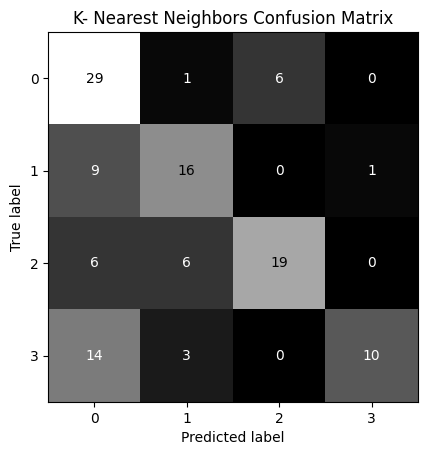

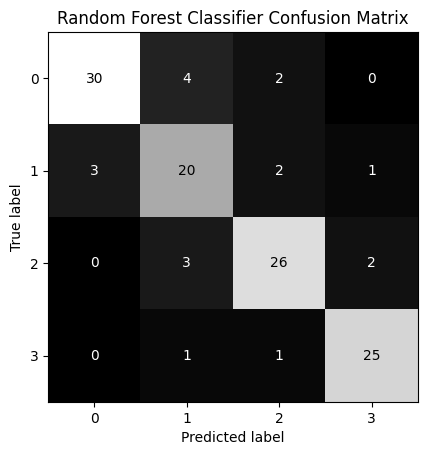

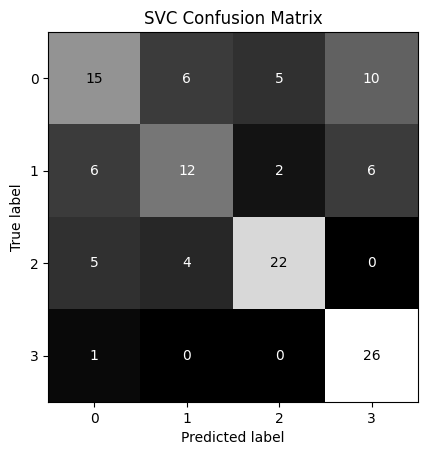

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = ['K- Nearest Neighbors', 'Random Forest Classifier', 'SVC']
predictions = [knn_pred, rfc_pred, svc_pred]

for model, prediction in zip(models, predictions):
    disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")



# KNN accuracy
knn_accuracy = accuracy_score(Y_test, knn_pred)
print(f"KNN accuracy: {knn_accuracy}")

# Random Forest accuracy
rfc_accuracy = accuracy_score(Y_test, rfc_pred)
print(f"Random Forest accuracy: {rfc_accuracy}")

# SVM accuracy
svc_accuracy = accuracy_score(Y_test, svc_pred)
print(f"SVM accuracy: {svc_accuracy}")

#set values functions
lc = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()

#using data to fit the models
lc.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

#form categorization of each dataset
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

#model, predication, pred_probabilities array functions
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba]



